<a href="https://colab.research.google.com/github/hikmatilloahatov/Azarbaijan-supermarkets-data-visualizations/blob/main/Zabrat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019-yil uchun "Zabrat" supermarketidagi savdo holati


In [136]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [138]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://github.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/blob/main/Zabrat.csv?raw=true", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,GONDOL SIMPLE LABABO VE BUZLUK HALISI G61*50,Maishiy buyumlar,3.68,2019-07-19,True
1,TAXTA BICAQ 3232,Idish-tovoq,2.25,2019-07-19,True
2,VITA 1LT ANANAS SIRESI,Mevali sharbatlar,2.50,2019-07-19,True
3,GILAN BAGDAN 1LT SARI GAVALI KOMPOTU,Kompotlar,1.45,2019-07-19,True
4,OSRAM SUPERSTAR LAMPA 64544A ECO 57W E27,Maishiy buyumlar,2.92,2019-07-19,True
5,BEKO 2111P DEM SAMOVARI,Maishiy buyumlar,94.00,2019-07-19,True
6,BOSTAN 3KG QARISIQ TURSU PL/Q,Tuzlamalar,6.85,2019-07-19,True
7,ULKER CAFE CROWN 17GR KOFE LATTE KARAMELLI,"Kofe, kakao va h.k",0.40,2019-07-19,True
8,ETRI-SAH 50GR SARI KOK POSET,Ziravorlar,0.75,2019-06-28,False
9,AGE 1LT LEKECIXARICI LIMON TERAVETI,"Yuvish vositalari, tozalagichlar",1.10,2019-06-28,False


In [139]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21198 entries, 0 to 21197
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mahsulot_nomi   21198 non-null  object 
 1   mahsulot_turi   21198 non-null  object 
 2   mahsulot_narhi  21198 non-null  float64
 3   sotilgan_vaqti  21198 non-null  object 
 4   bonus_karta     21198 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 683.3+ KB


In [140]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [141]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21198 entries, 0 to 21197
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   21198 non-null  object        
 1   mahsulot_turi   21198 non-null  object        
 2   mahsulot_narhi  21198 non-null  float64       
 3   sotilgan_vaqti  21198 non-null  datetime64[ns]
 4   bonus_karta     21198 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 683.3+ KB


In [142]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2257
1988
2216
1979
2277
2102
2106
2028
2042
2184
19
0


In [143]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2257
1988
2216
1979
2277
2102
2106
2028
2042
2184
0
0


In [144]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,GONDOL SIMPLE LABABO VE BUZLUK HALISI G61*50,Maishiy buyumlar,3.68,2019-07-19,True
1,TAXTA BICAQ 3232,Idish-tovoq,2.25,2019-07-19,True
2,VITA 1LT ANANAS SIRESI,Mevali sharbatlar,2.50,2019-07-19,True
3,GILAN BAGDAN 1LT SARI GAVALI KOMPOTU,Kompotlar,1.45,2019-07-19,True
4,OSRAM SUPERSTAR LAMPA 64544A ECO 57W E27,Maishiy buyumlar,2.92,2019-07-19,True
...,...,...,...,...,...
21193,FENFANG PALTAR SETKASI 30X50 SM NO:1216,Idish-tovoq,1.85,2019-09-15,True
21194,SUTAS 1KG PENDIR BEYAZ YAGLI PL/Q,Pishloqlar,12.90,2019-09-15,True
21195,SIGARET WANT SILVER,Tamaki mahsulotlari,1.20,2019-09-15,True
21196,SAVILLE 370GR GOBELEK TURSUSU DOG-MIS S/Q,Tuzlamalar,3.55,2019-09-15,True


In [145]:
#9 2019-yilda "Zabrat" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,4843
Maishiy buyumlar,1195
"Yuvish vositalari, tozalagichlar",1022
Mevali sharbatlar,998
Idish-tovoq,824
...,...
Qaymoq,26
Tayyor ovqatlar,15
Kefir,13
Muzlatilgan mahsulotlar,7


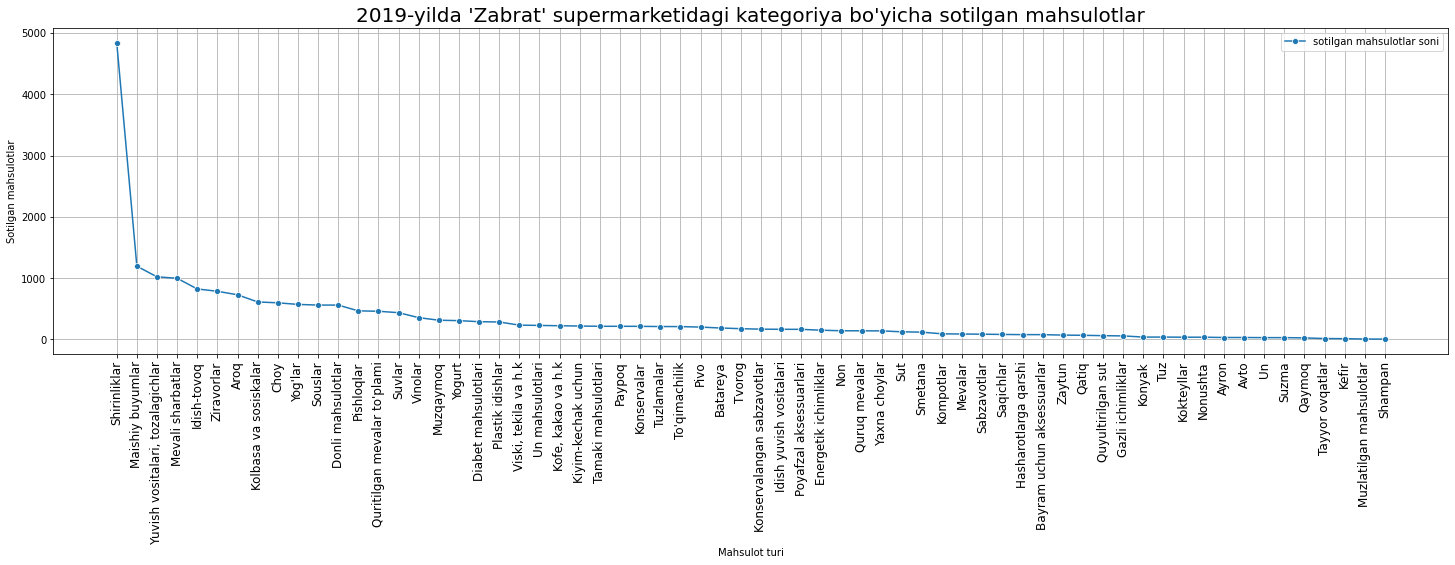

In [146]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda 'Zabrat' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [147]:
#10 2019-yilda "Zabrat" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,10911.62
Avto,169.35
Ayron,24.95
Batareya,737.54
Bayram uchun aksessuarlar,212.65
...,...
Yog'lar,4944.18
Yogurt,376.02


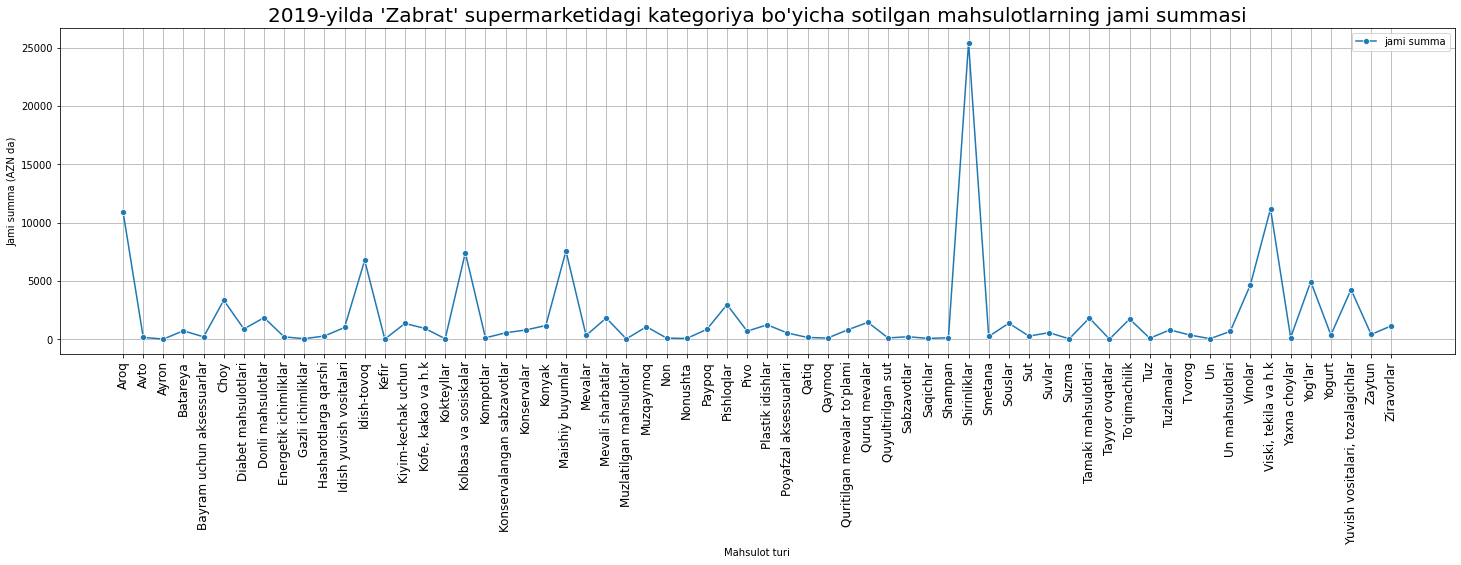

In [149]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda 'Zabrat' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [150]:
#11 2019-yilda "Zabrat" supermarketida nechta mijoz mahsulotni bonus karta orqali 
# xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10740,10439


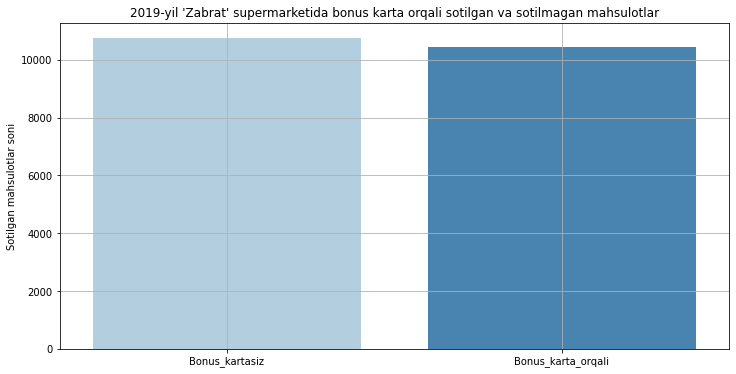

In [151]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil 'Zabrat' supermarketida bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [152]:
#12 2019-yilda "Zabrat" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,2257
Fevral,1988
Mart,2216
Aprel,1979
May,2277
Iyun,2102
Iyul,2106
Avgust,2028
Sentabr,2042
Oktabr,2184


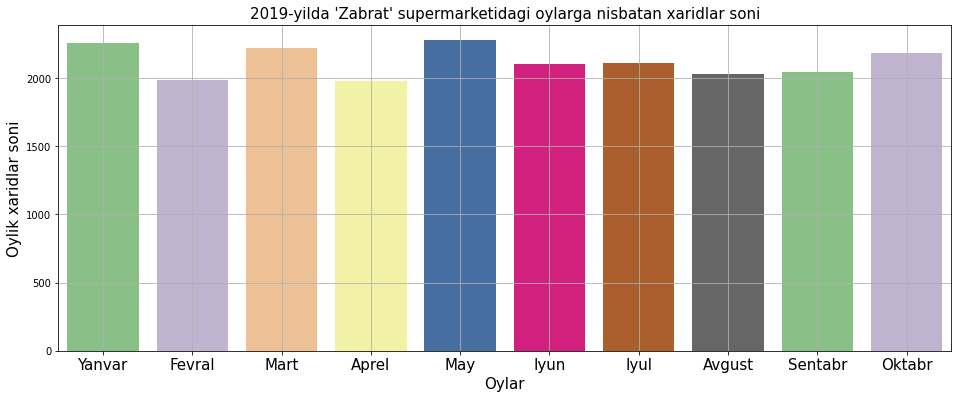

In [153]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda 'Zabrat' supermarketidagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [154]:
#13 2019-yilda "Zabrat" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,3112
Seshanba,3046
Chorshanba,2932
Payshanba,2987
Juma,2952
Shanba,2959
Yakshanba,3191


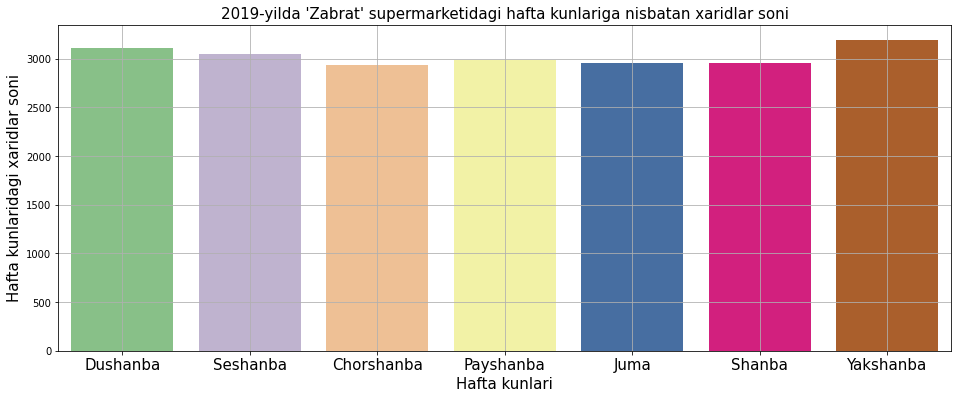

In [155]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda 'Zabrat' supermarketidagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [156]:
#14 2019-yilda "Zabrat" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,737
2,740
3,687
4,609
5,745
6,730
7,584
8,704
9,783
10,621


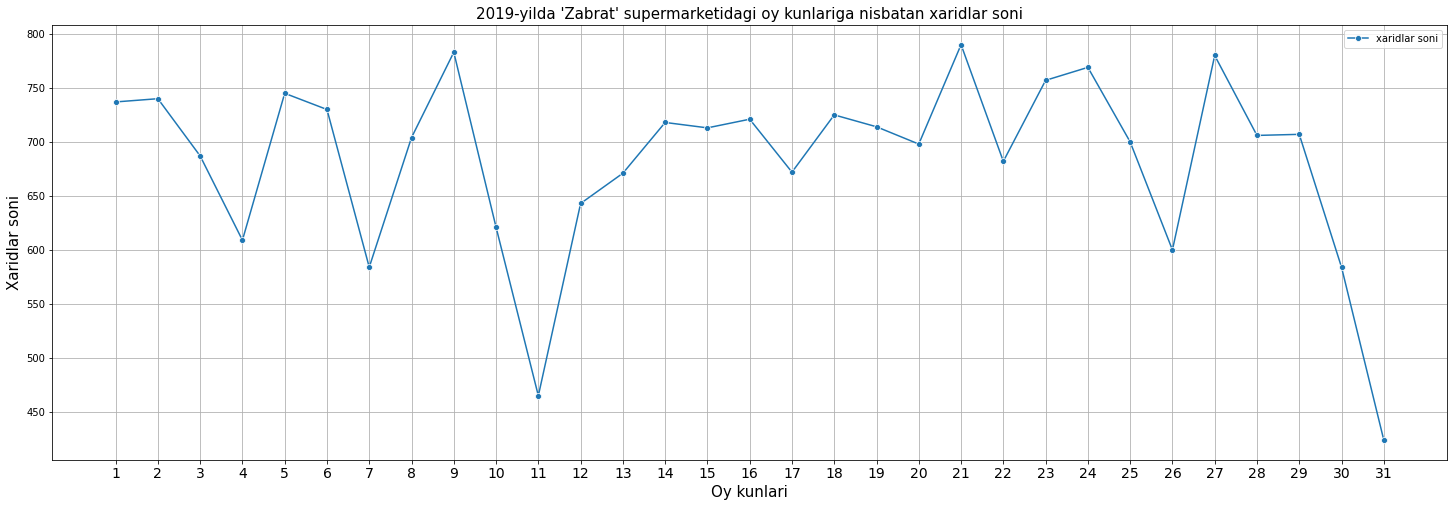

In [157]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda 'Zabrat' supermarketidagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [158]:
#15 2019-yil 'Zabrat' supermarketidagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [159]:
len(oy_sanalari)

310

In [160]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [161]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [162]:
df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Yanvar,38,61,56,75,105,88,82,50,93,107,28,79,105,64,29,50,94,89,96,109,70,44,84,84,109,55,56,69,75,51,62
Fevral,47,76,93,59,65,56,37,69,106,34,99,91,37,77,80,65,53,83,54,72,78,80,51,111,99,68,83,65,0,0,0
Mart,83,37,59,62,59,85,68,81,58,54,13,61,91,76,72,101,60,79,104,63,121,93,62,87,73,41,67,92,60,64,90
Aprel,77,103,45,67,93,58,77,57,51,41,47,45,46,118,56,55,27,61,61,73,90,87,80,71,21,84,107,17,96,68,0
May,64,73,77,56,82,71,89,98,59,75,36,96,96,83,60,88,65,68,75,42,114,73,87,62,87,78,76,69,41,77,60
Iyun,77,101,71,75,87,61,33,38,108,90,56,104,50,64,57,56,72,68,68,41,70,71,73,83,60,71,78,81,73,65,0
Iyul,89,91,58,57,56,100,64,106,63,51,36,78,85,56,95,94,50,77,90,70,43,64,76,64,19,43,83,71,84,34,59
Avgust,51,86,67,40,52,52,57,30,54,63,52,21,43,53,101,98,95,58,60,76,74,79,71,55,81,49,88,77,118,52,75
Sentabr,103,81,85,53,75,77,31,88,70,54,48,26,62,61,60,60,65,97,44,75,57,40,94,60,88,58,51,87,94,98,0
Oktabr,108,31,76,65,71,82,46,87,121,52,50,42,56,66,103,54,91,45,62,77,73,51,79,92,63,53,91,78,66,75,78


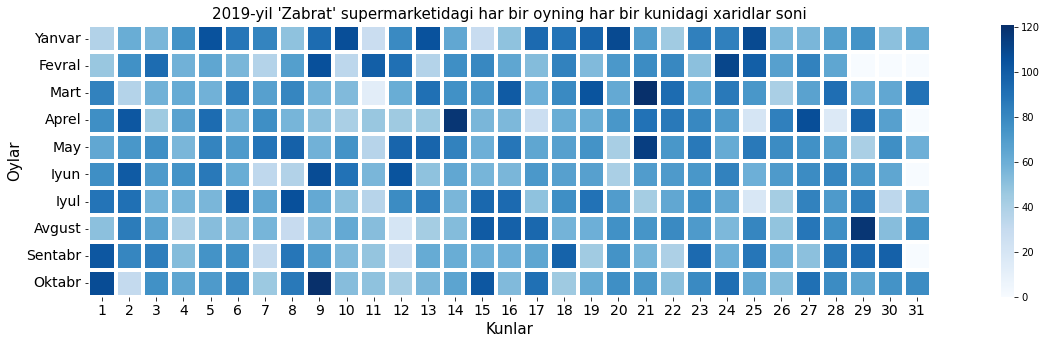

In [163]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil 'Zabrat' supermarketidagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

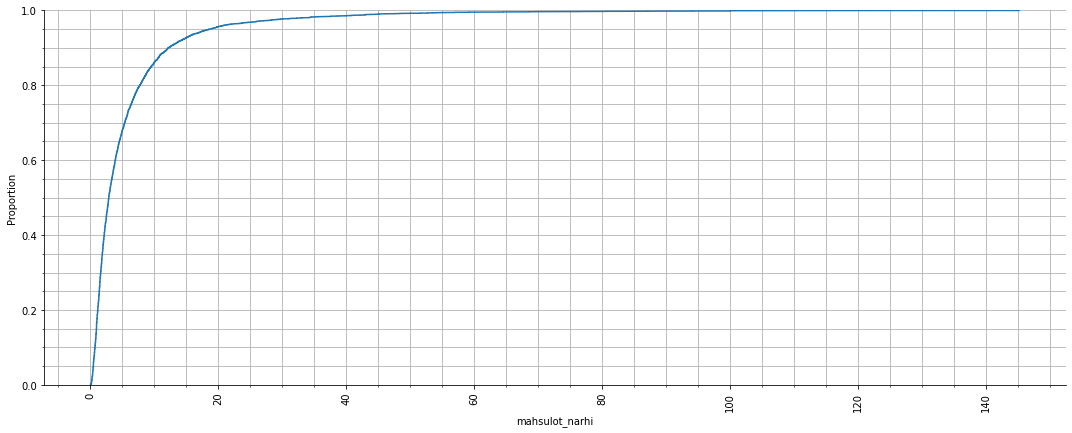

In [164]:
#16 Ko'rinadiki, sotilgan mahsulotlarning 50% i 3 azngacha, 90% i esa 12 azngacha bo'lgan mahsulotlar
sns.displot(data=df, x='mahsulot_narhi', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()